## Accessing the Central Statistics Office (CSO) API with JSON-stat for Python

This notebook demonstrates how to access the Statbank API for Central Statistics Office (CSO) Ireland.
The [Statbank API](https://www.cso.ie/webserviceclient/) utilises the [JSON-stat](https://www.cso.ie/webserviceclient/) format for encoding statistical information. This can be accessed using the [jsonstat.py](https://github.com/26fe/jsonstat.py) library for Python by [Giovanni F](http://www.26fe.com/). Further documentation is available online: [jsonstat.py](https://jsonstatpy.readthedocs.io/en/latest/).

#### Import Packages

In [183]:
from os import path
import jsonstat
import matplotlib.pyplot as plt
import pandas as pd

#### Create a cache directory to store copies of downloaded data for faster development and consistency

In [34]:
cache_dir = path.abspath(path.join("..", "Test_Data", "CSO_Test_DATA"))
jsonstat.cache_dir(cache_dir)

'C:\\Users\\olive\\Documents\\GitHub Repositories\\Python Repositories\\Test_Data\\CSO_Test_DATA'

#### Identify CSO JSON table to download by table number

In [35]:
#Provide table identifier
table_id = "QLF08"

#Provide base url
base_uri = 'https://www.cso.ie/StatbankServices/StatbankServices.svc/jsonservice/responseinstance/'
uri = base_uri + table_id

#Specify name for cached file
filename = "cso_ie_" + table_id + ".json"

#### Load data into a collection

In [39]:
collection = jsonstat.from_url(uri, filename)
print(collection)

JsonstatCollection contains the following JsonStatDataSet:
+-----+-----------+
| pos | dataset   |
+-----+-----------+
| 0   | 'dataset' |
+-----+-----------+


#### Select the first dataset in the collection and print its description

In [41]:
dataset = collection_1.dataset(0)
print(dataset)

name:   'dataset'
label:  'Persons aged 15 years and over by Region, Quarter and Statistic'
source: 'Persons aged 15 years and over by Region, Quarter and Statistic'
size: 1800
+-----+-----------+-----------+------+--------+
| pos | id        | label     | size | role   |
+-----+-----------+-----------+------+--------+
| 0   | Region    | Region    | 12   |        |
| 1   | Quarter   | Quarter   | 30   | time   |
| 2   | Statistic | Statistic | 5    | metric |
+-----+-----------+-----------+------+--------+


#### Print dimensions of the dataset for reveiw

In [80]:
print(dataset.dimension('Region'))
print(dataset.dimension('Quarter'))
print(dataset.dimension('Statistic'))

+-----+---------+------------------------+
| pos | idx     | label                  |
+-----+---------+------------------------+
| 0   | '-'     | 'State'                |
| 1   | 'IE04'  | 'Northern and Western' |
| 2   | 'IE041' | 'Border'               |
| 3   | 'IE042' | 'West'                 |
| 4   | 'IE05'  | 'Southern'             |
| 5   | 'IE051' | 'Mid-West'             |
| 6   | 'IE052' | 'South-East'           |
| 7   | 'IE053' | 'South-West'           |
| 8   | 'IE06'  | 'Eastern and Midland'  |
| 9   | 'IE061' | 'Dublin'               |
| 10  | 'IE062' | 'Mid-East'             |
| 11  | 'IE063' | 'Midland'              |
+-----+---------+------------------------+
+-----+----------+----------+
| pos | idx      | label    |
+-----+----------+----------+
| 0   | '2012Q1' | '2012Q1' |
| 1   | '2012Q2' | '2012Q2' |
| 2   | '2012Q3' | '2012Q3' |
| 3   | '2012Q4' | '2012Q4' |
| 4   | '2013Q1' | '2013Q1' |
| 5   | '2013Q2' | '2013Q2' |
| 6   | '2013Q3' | '2013Q3' |
| 7   | '201

#### Return a value

In this case we'll select the value associated with the statistic for the number of unemployed people (thousands) in Dublin for the first quarter of 2019.

In [88]:
dataset.data(Region='Dublin', Quarter='2019Q1', Statistic='QLF08C02')

JsonStatValue(idx=1491, value=32.1, status=None)

In [111]:
dataset.value(Region='Dublin', Quarter='2019Q1', Statistic='QLF08C02')

32.1

#### Convert dataset to a Pandas data frame

In [167]:
df_dataset = dataset.to_data_frame()
df_dataset.head(10)

,Region,Quarter,Statistic,Value
0,State,2012Q1,Persons aged 15 years and over in Employment (...,1863.2
1,State,2012Q1,Unemployed Persons aged 15 years and over (Tho...,348.1
2,State,2012Q1,Persons aged 15 years and over in Labour Force...,2211.3
3,State,2012Q1,ILO Unemployment Rate (15 - 74 years) (%),15.8
4,State,2012Q1,ILO Participation Rate (15 years and over) (%),61.4
5,State,2012Q2,Persons aged 15 years and over in Employment (...,1878.0
6,State,2012Q2,Unemployed Persons aged 15 years and over (Tho...,352.7
7,State,2012Q2,Persons aged 15 years and over in Labour Force...,2230.7
8,State,2012Q2,ILO Unemployment Rate (15 - 74 years) (%),15.9
9,State,2012Q2,ILO Participation Rate (15 years and over) (%),61.9


#### Extract a subset of the data

In this case we'll select the subset of data for the number of unemployed people (thousands) in Dublin for all quarters available in the dataset. Quarter will be used as the index for the data frame. The region and statistic chose for the subset need to be specified by their index (idx).

In [177]:
df_dublin = dataset.to_data_frame(blocked_dims={'Region':'IE061', 'Statistic':'QLF08C02'})
df_dublin

,Region,Quarter,Statistic,Value
0,Dublin,2012Q1,Unemployed Persons aged 15 years and over (Tho...,85.1
1,Dublin,2012Q2,Unemployed Persons aged 15 years and over (Tho...,79.7
2,Dublin,2012Q3,Unemployed Persons aged 15 years and over (Tho...,84.9
3,Dublin,2012Q4,Unemployed Persons aged 15 years and over (Tho...,72.2
4,Dublin,2013Q1,Unemployed Persons aged 15 years and over (Tho...,72.1
5,Dublin,2013Q2,Unemployed Persons aged 15 years and over (Tho...,79.5
6,Dublin,2013Q3,Unemployed Persons aged 15 years and over (Tho...,70.2
7,Dublin,2013Q4,Unemployed Persons aged 15 years and over (Tho...,66.6
8,Dublin,2014Q1,Unemployed Persons aged 15 years and over (Tho...,69.5
9,Dublin,2014Q2,Unemployed Persons aged 15 years and over (Tho...,68.0


#### Get summary statistics for the dataframe

In [178]:
df_dublin.describe()

,Value
count,30.000000
mean,56.830000
std,15.874924
min,32.100000
25%,44.725000
50%,55.900000
75%,70.025000
max,85.100000


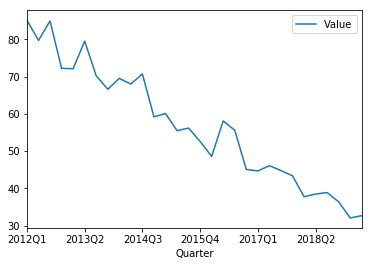

<Figure size 1280x480 with 0 Axes>

In [185]:
ax = plt.gca()

df_dublin.plot(kind='line',x='Quarter',y='Value',ax=ax)

plt.show()